# Preset model evaluation

We evaluate and display metrics of previously trained models here in addition to dataset statistics and other observations.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils import Dataset, renameH, process_ann_results
import utils as u
from sklearn import inspection, compose, base, model_selection, metrics
import pandas as pd
import seaborn as sns
idx = pd.IndexSlice

# Read presets

In [3]:
htp = Dataset.from_pickle("../output/htp.pkl")
dp = Dataset.from_pickle("../output/dp.pkl")
extra_htp = Dataset.from_pickle("../output/extra_htp.pkl")
extra_dp = Dataset.from_pickle("../output/extra_dp.pkl")


# Pair plots

D:\conda_envs\ann\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


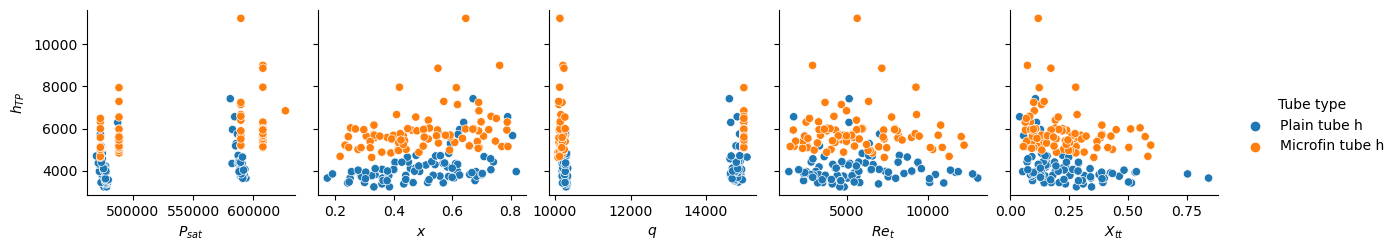

D:\conda_envs\ann\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


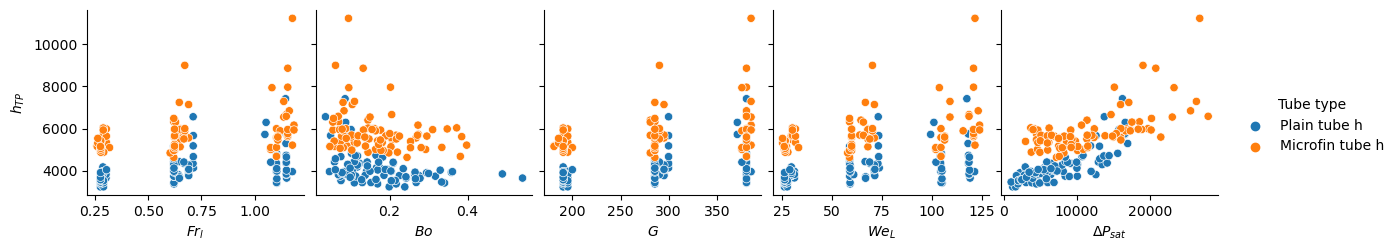

In [4]:
htp.displayPairs(target_var='Heat transfer coefficient', row_len=5)

D:\conda_envs\ann\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


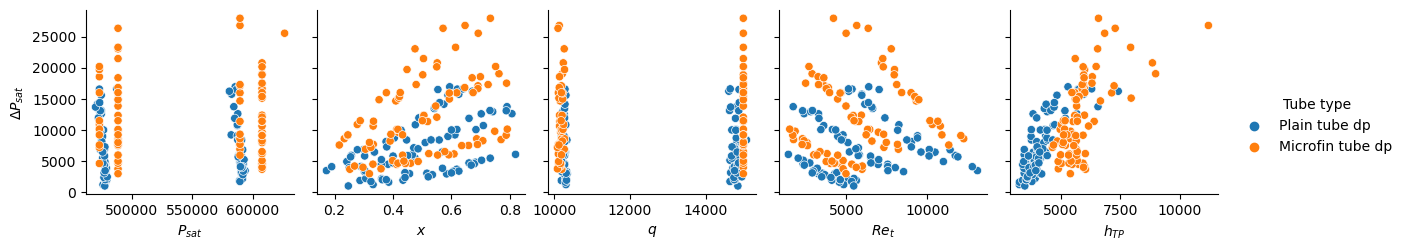

D:\conda_envs\ann\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


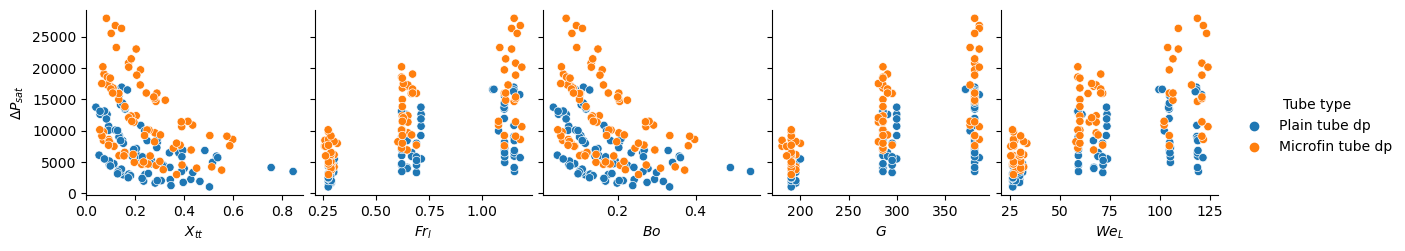

In [5]:
dp.displayPairs(target_var='Pressure drop', row_len=5)

# Histograms

D:\conda_envs\ann\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


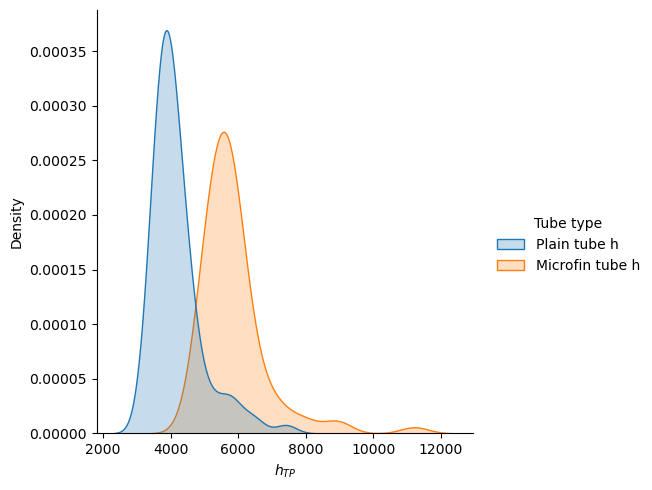

In [6]:
htp.displayHistogram('Heat transfer coefficient')

D:\conda_envs\ann\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


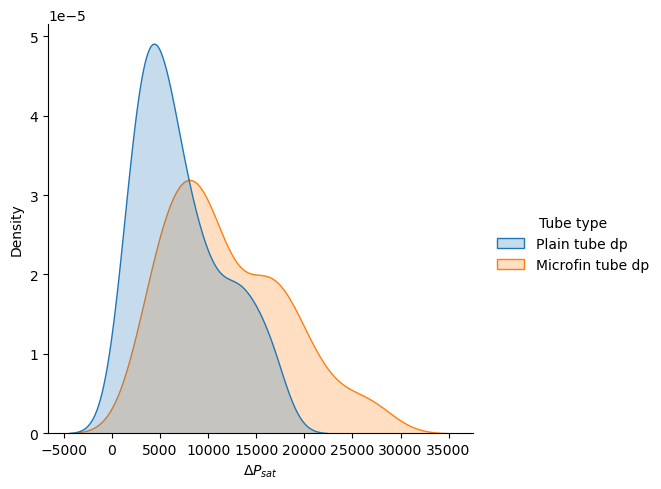

In [7]:
dp.displayHistogram('Pressure drop')

# Data Shapes

In [198]:
htp.displayEDA(stylized=False).reset_index(drop=True).set_index("Variable").rename(u.NAME_KEYS).round(4)

c:\Users\berk_\OneDrive\JWorkspace\cihan\ml_calismasi\notebook\utils.py:278: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data = self.data.groupby('dataset').agg(['mean']).T \


dataset,Microfin tube h,Plain tube h,Deviation
Variable,,,
$G$,282.6790,287.5162,0.0168
$P_{sat}$,546880.0000,533260.9760,0.0255
$q$,12442.8455,12606.3715,0.0130
$x$,0.5053,0.4948,0.0212
$\Delta P_{sat}$,11966.4471,7230.3531,0.6550
$Re_{t}$,5715.9920,5786.6250,0.0122
$X_{tt}$,0.2291,0.2332,0.0178
$Fr_{l}$,0.6696,0.6874,0.0258
$We_{L}$,67.1376,68.2394,0.0161


In [206]:
u.NAME_KEYS

{'Mass flux': '$G$',
 'Saturation pressure': '$P_{sat}$',
 'Heat flux': '$q$',
 'Quality': '$x$',
 'Pressure drop': '$\\Delta P_{sat}$',
 'Reynolds number': '$Re_{t}$',
 'Two-phase multiplier': '$X_{tt}$',
 'Froude number': '$Fr_{l}$',
 'Weber number': '$We_{L}$',
 'Bond number': '$Bo$',
 'Heat transfer coefficient': '$h_{TP}$'}

In [205]:
htp.displayStatsByCat(stylized=False).T.rename(u.NAME_KEYS).round(4)

Category,Microfin tube h_0,Microfin tube h_1,Microfin tube h_2,Plain tube h_0,Plain tube h_1,Plain tube h_2
$G$,190.1870,286.8724,381.4678,191.8585,290.1344,380.3345
$P_{sat}$,553660.0000,542119.6154,544539.5238,538495.0828,531933.7702,518203.4127
$q$,12476.0799,12217.5586,12706.6337,12529.8412,12931.2808,12851.2493
$x$,0.5171,0.5379,0.4286,0.5251,0.5450,0.4349
$\Delta P_{sat}$,6033.2609,13041.5385,16913.0000,3264.0382,8375.9545,10362.2857
$Re_{t}$,3725.8792,5284.0970,8893.7049,3629.1762,5010.5310,8454.0280
$X_{tt}$,0.2260,0.1960,0.2881,0.2065,0.1850,0.2836
$Fr_{l}$,0.2832,0.6416,1.1353,0.2866,0.6544,1.1182
$We_{L}$,28.5613,64.1575,113.7164,28.5652,65.0110,109.8583
$Bo$,0.1635,0.1440,0.2039,0.1508,0.1359,0.1995


In [194]:
htp.displayDecompositionResults(stylized=False).rename(u.NAME_KEYS).round(4).rename_axis("Variable", axis=0)

,PCA1,PCA2
Variable,,
$G$,0.3714,0.3361
$P_{sat}$,0.0356,-0.0280
$q$,-0.0318,0.0447
$x$,-0.3384,0.3653
$\Delta P_{sat}$,0.0724,0.5194
$Re_{t}$,0.4569,-0.0598
$X_{tt}$,0.3481,-0.3646
$Fr_{l}$,0.3792,0.3258
$We_{L}$,0.3801,0.3219


In [209]:
htp.sample_category.value_counts()*0.2

Plain tube h c:1       6.2
Microfin tube h c:1    6.0
Plain tube h c:0       5.8
Plain tube h c:2       5.8
Microfin tube h c:0    5.8
Microfin tube h c:2    5.2
Name: count, dtype: float64

In [45]:
htp.displayTrainTestStats().round(2).rename(u.NAME_KEYS).rename_axis('S').reset_index().assign(Var=lambda x: x['S'].map({v:k for k, v in u.NAME_KEYS.items()})).set_index('Var')

S      Train                 Test  \
                                             mean       std       mean   
Var                                                                      
Mass flux                          $G$     282.03     77.09     297.56   
Saturation pressure          $P_{sat}$  538491.42  58687.15  545563.43   
Heat flux                          $q$   12601.34   2349.82   12229.23   
Quality                            $x$       0.50      0.16       0.50   
Pressure drop         $\Delta P_{sat}$    9494.69   5798.09    9739.64   
Reynolds number               $Re_{t}$    5674.50   2657.72    6059.21   
Two-phase multiplier          $X_{tt}$       0.23      0.14       0.24   
Froude number                 $Fr_{l}$       0.66      0.34       0.74   
Weber number                  $We_{L}$      66.14     34.16      73.91   
Bond number                       $Bo$       0.16      0.09       0.17   

                               Comparison  
                           std    p-value  
Var                                        
Mass flux                75.21       0.28  
Saturation pressure   60585.98       0.87  
Heat flux              2353.62       0.72  
Quality                   0.16       0.97  
Pressure drop          6135.74       0.79  
Reynolds number        2907.33       0.54  
Two-phase multiplier      0.18       0.99  
Froude number             0.34       0.25  
Weber number             35.35       0.25  
Bond number               0.11       1.00

In [310]:
cv = u.ArbitraryStratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [327]:
htp.addModel(u.getANNRandomSearch(), 'ANN')

Fitting 3 folds for each of 30 candidates, totalling 90 fits


d:\conda_envs\ann\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [311]:
htp.addModel(u.getGBMFocused(cv=cv), 'GBMFocused')

Fitting 5 folds for each of 135 candidates, totalling 675 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 390
[LightGBM] [Info] Number of data points in the train set: 139, number of used features: 10
[LightGBM] [Info] Start training from score 5002.499283
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [267]:
htp.addModel(u.getLwrExtendedNeighbors(), 'LWR')

In [328]:
htp.displayAllModelTestResults()

,ANN,LWR,GBM,ANNRandomized,LWRExtended,GBMFocused
R2,0.716894,0.835145,0.703180,0.716894,0.835145,0.683869
RMSE,622.941590,475.360741,637.851253,622.941590,475.360741,658.273606
MAE,465.045068,343.231024,508.478730,465.045068,343.231024,519.676893
MAPE,0.091403,0.065942,0.104531,0.091403,0.065942,0.107837
Bias%,0.003602,-0.007414,0.005002,0.003602,-0.007414,0.009371
WAPE%,0.093778,0.069214,0.102536,0.093778,0.069214,0.104795
Pearson-R,0.742428,0.836384,0.703965,0.742428,0.836384,0.686312


In [336]:
dp.displayAllModelTestResults()

,ANN,LWR,GBM
R2,0.876092,0.885222,0.878228
RMSE,2128.738423,2048.815365,2110.313716
MAE,1313.888409,1164.670400,1262.564792
MAPE,0.147334,0.129438,0.146801
Bias%,0.020617,0.041475,-0.005331
WAPE%,0.134901,0.119580,0.129632
Pearson-R,0.877317,0.891208,0.883997


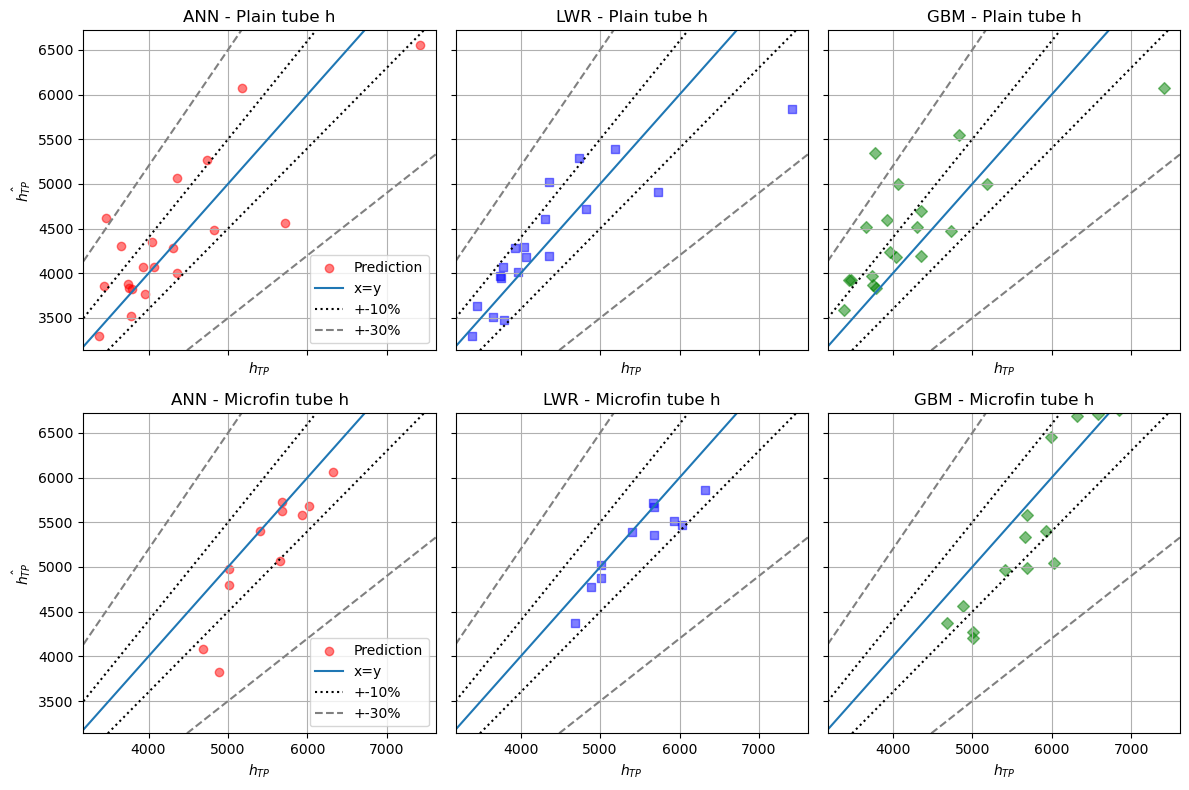

In [344]:
htp.plot_predictions(model_keys=['ANN', 'LWR', 'GBM'], figure_kwargs={'sharex': True, 'figsize': (12, 8)})

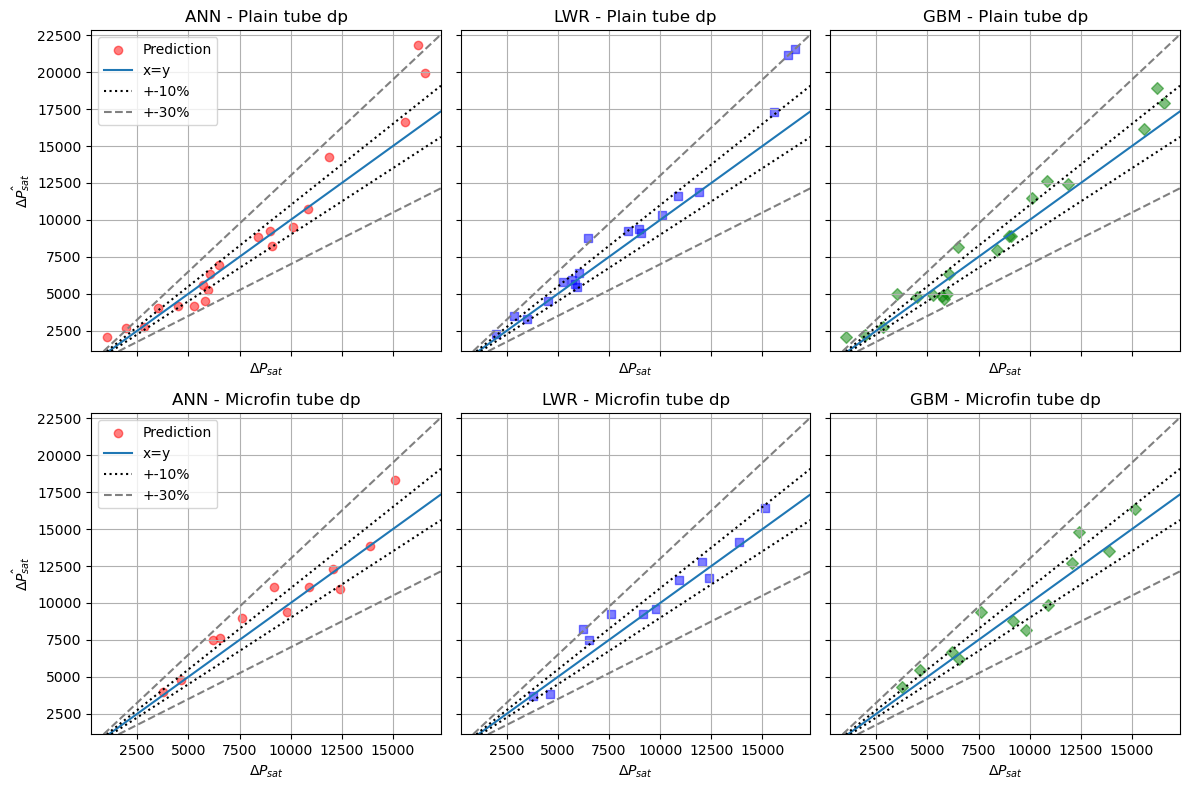

In [343]:
dp.plot_predictions(model_keys=['ANN', 'LWR', 'GBM'], figure_kwargs={'sharex': True, 'figsize': (12, 8)}, target_label='\Delta P_{sat}')

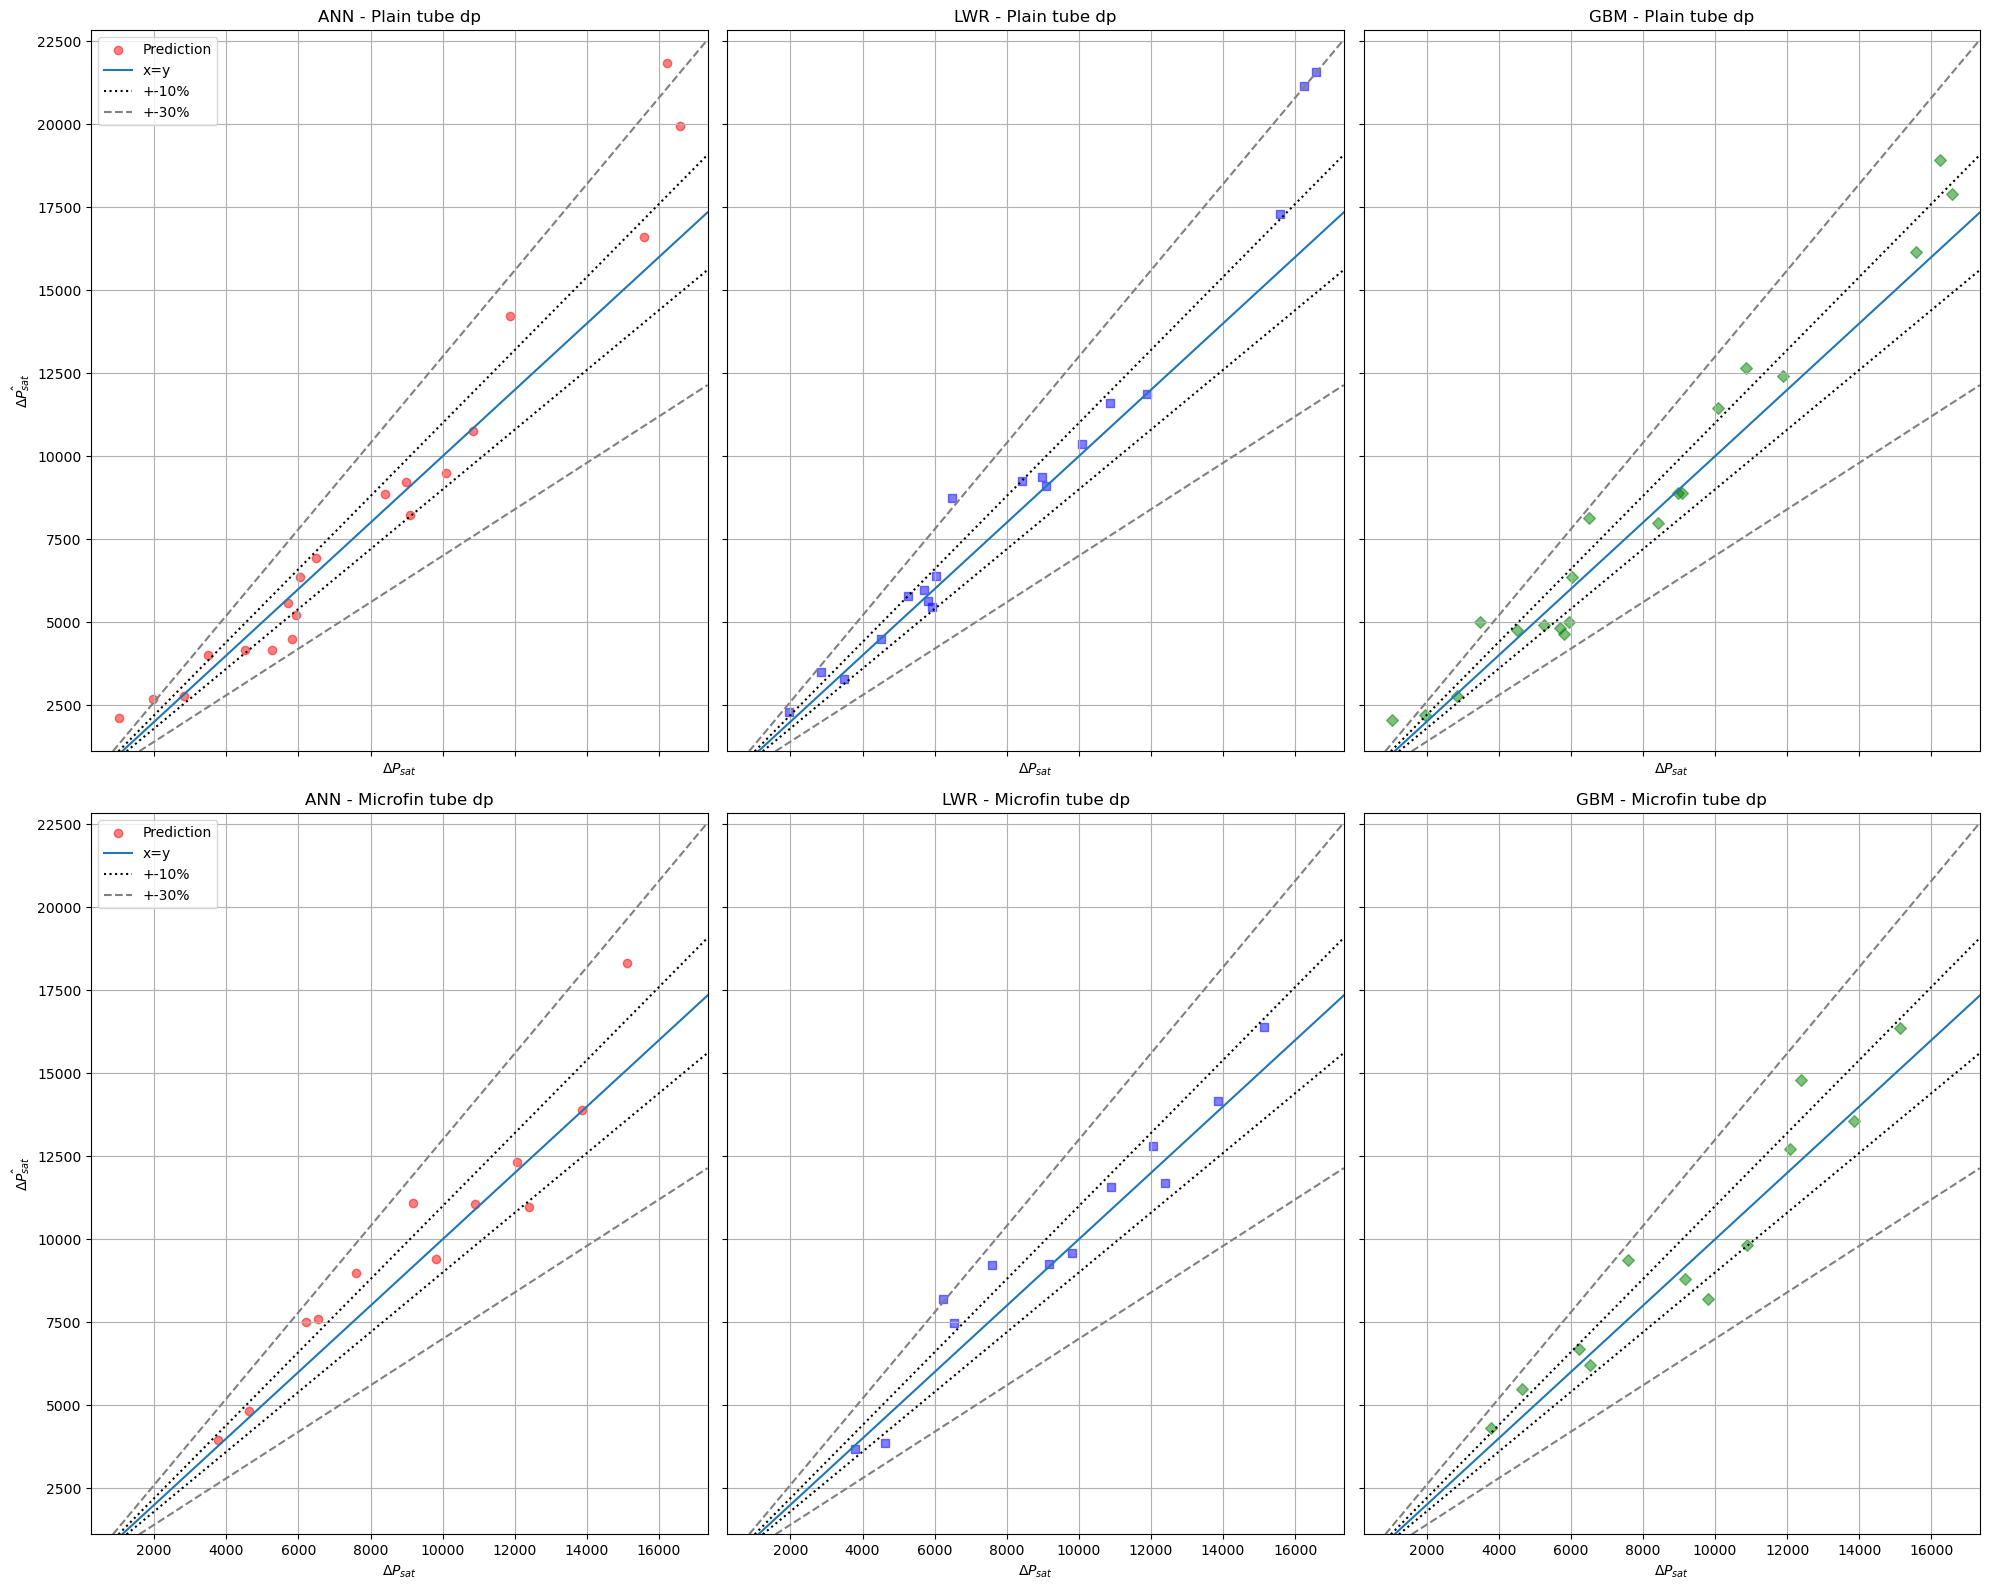

In [335]:
dp.plot_predictions(model_keys=['ANN', 'LWR', 'GBM'], figure_kwargs={'sharex': True}, target_label='\Delta P_{sat}')

In [239]:
extra_htp.addModel(u.getANNRandomSearch(), 'ANNRandomized')

Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [345]:
extra_htp.displayAllModelTestResults()

,ANN,LWR,GBM,ANNRandomized
R2,0.656591,0.758915,0.488506,-0.402077
RMSE,866.287529,725.841152,1057.246388,1750.419268
MAE,639.002225,534.330825,691.413324,1036.491070
MAPE,0.106882,0.089451,0.108179,0.167003
Bias%,-0.000478,-0.061961,-0.105414,0.071750
WAPE%,0.112055,0.093700,0.121246,0.181759
Pearson-R,0.739996,0.818665,0.693040,0.652408


In [351]:
import matplotlib.pyplot as plt

(2000.0, 9000.0)

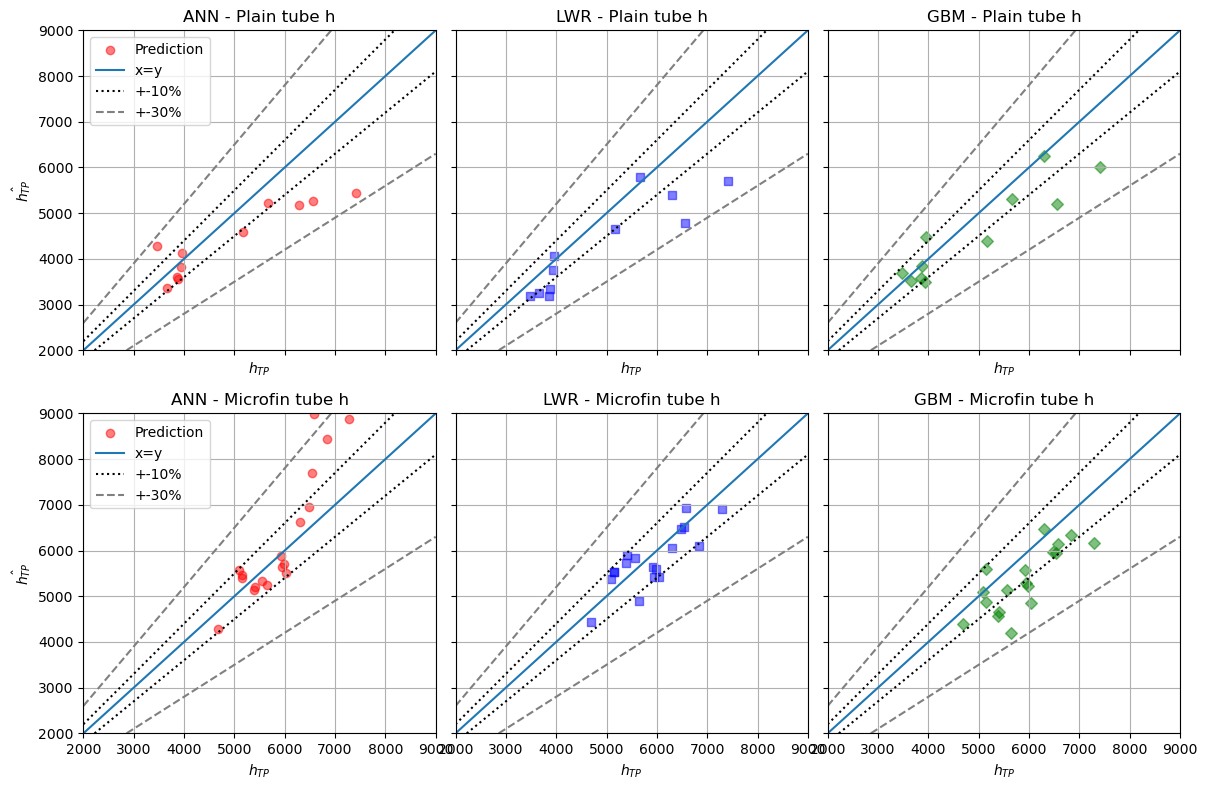

In [357]:
extra_htp.plot_predictions(model_keys=['ANN', 'LWR', 'GBM'], figure_kwargs={'figsize': (12, 8), 'sharex': True})
plt.xlim(2000, 9000)
plt.ylim(2000, 9000)


In [346]:
extra_dp.displayAllModelTestResults()

,ANN,LWR,GBM
R2,0.782722,0.892526,0.797908
RMSE,3620.084787,2546.028091,3491.286456
MAE,2345.396885,1467.013207,2521.314907
MAPE,0.245799,0.138102,0.258896
Bias%,0.032832,-0.039127,-0.058741
WAPE%,0.220685,0.138035,0.237238
Pearson-R,0.787135,0.909326,0.850107


In [363]:
extra_dp.X_test.shape

(30, 10)

In [367]:
htp.displayTrainTestStats()

Train                         Test  \
                               mean           std           mean   
Mass flux                282.029556     77.089806     297.558499   
Saturation pressure   538491.415562  58687.147696  545563.431469   
Heat flux              12601.337777   2349.823368   12229.228200   
Quality                    0.501118      0.158041       0.495182   
Pressure drop           9494.690594   5798.094909    9739.641073   
Reynolds number         5674.497732   2657.723149    6059.207562   
Two-phase multiplier       0.228337      0.136222       0.242467   
Froude number              0.664509      0.342018       0.735010   
Weber number              66.136773     34.155439      73.914163   
Bond number                0.164665      0.088016       0.173061   

                                   Comparison  
                               std    p-value  
Mass flux                75.209953   0.281716  
Saturation pressure   60585.975272   0.874749  
Heat flux              2353.616765   0.718047  
Quality                   0.162943   0.971364  
Pressure drop          6135.744125   0.789932  
Reynolds number        2907.325113   0.544195  
Two-phase multiplier      0.175163   0.992463  
Froude number             0.343376   0.249789  
Weber number             35.351070   0.252921  
Bond number               0.109889   0.998493

In [370]:
scs.ks_2samp(htp.y_test, extra_htp.y_test).pvalue

0.01899929869073201

In [394]:
u.compareDatasetDists(htp, extra_htp, keys=['Standard Split', 'Outlier Split'])

,Standard Split,Outlier Split
Mass flux,1.205189e-03,3.971154e-03
Saturation pressure,2.461109e-03,1.722711e-03
Heat flux,8.621726e-07,1.667894e-01
Quality,7.718811e-01,5.504668e-09
Pressure drop,6.518109e-01,4.389653e-03
Reynolds number,8.724508e-01,4.822991e-02
Two-phase multiplier,8.677080e-01,1.116201e-10
Froude number,2.484448e-02,2.118651e-02
Weber number,3.968187e-04,6.683796e-02
Bond number,8.726342e-01,1.440337e-10


In [385]:
extra_htp.displayTrainTestDistStats().round(4)

Train                     Test              \
                             mean         std         mean         std   
Mass flux                284.7645     76.4220     287.0188     79.6293   
Saturation pressure   537636.7900  58987.9201  550844.3033  58600.8614   
Heat flux              12491.3483   2347.5625   12695.1593   2385.9785   
Quality                    0.4919      0.1361       0.5386      0.2385   
Pressure drop           9104.4098   5214.7214   11653.8138   8032.1509   
Reynolds number         5828.7517   2564.2853    5388.0485   3325.3014   
Two-phase multiplier       0.2255      0.1175       0.2587      0.2354   
Froude number              0.6760      0.3406       0.6918      0.3568   
Weber number              67.3117     34.1836      69.5705     36.1729   
Bond number                0.1634      0.0759       0.1805      0.1498   

                     Comparison  
                        p-value  
Mass flux                0.0040  
Saturation pressure      0.0017  
Heat flux                0.1668  
Quality                  0.0000  
Pressure drop            0.0044  
Reynolds number          0.0482  
Two-phase multiplier     0.0000  
Froude number            0.0212  
Weber number             0.0668  
Bond number              0.0000

In [384]:
htp.displayTrainTestDistStats().round(4)

Train                     Test              \
                             mean         std         mean         std   
Mass flux                282.0296     77.0898     297.5585     75.2100   
Saturation pressure   538491.4156  58687.1477  545563.4315  60585.9753   
Heat flux              12601.3378   2349.8234   12229.2282   2353.6168   
Quality                    0.5011      0.1580       0.4952      0.1629   
Pressure drop           9494.6906   5798.0949    9739.6411   6135.7441   
Reynolds number         5674.4977   2657.7231    6059.2076   2907.3251   
Two-phase multiplier       0.2283      0.1362       0.2425      0.1752   
Froude number              0.6645      0.3420       0.7350      0.3434   
Weber number              66.1368     34.1554      73.9142     35.3511   
Bond number                0.1647      0.0880       0.1731      0.1099   

                     Comparison  
                        p-value  
Mass flux                0.0012  
Saturation pressure      0.0025  
Heat flux                0.0000  
Quality                  0.7719  
Pressure drop            0.6518  
Reynolds number          0.8725  
Two-phase multiplier     0.8677  
Froude number            0.0248  
Weber number             0.0004  
Bond number              0.8726

(-1000.0, 22500.0)

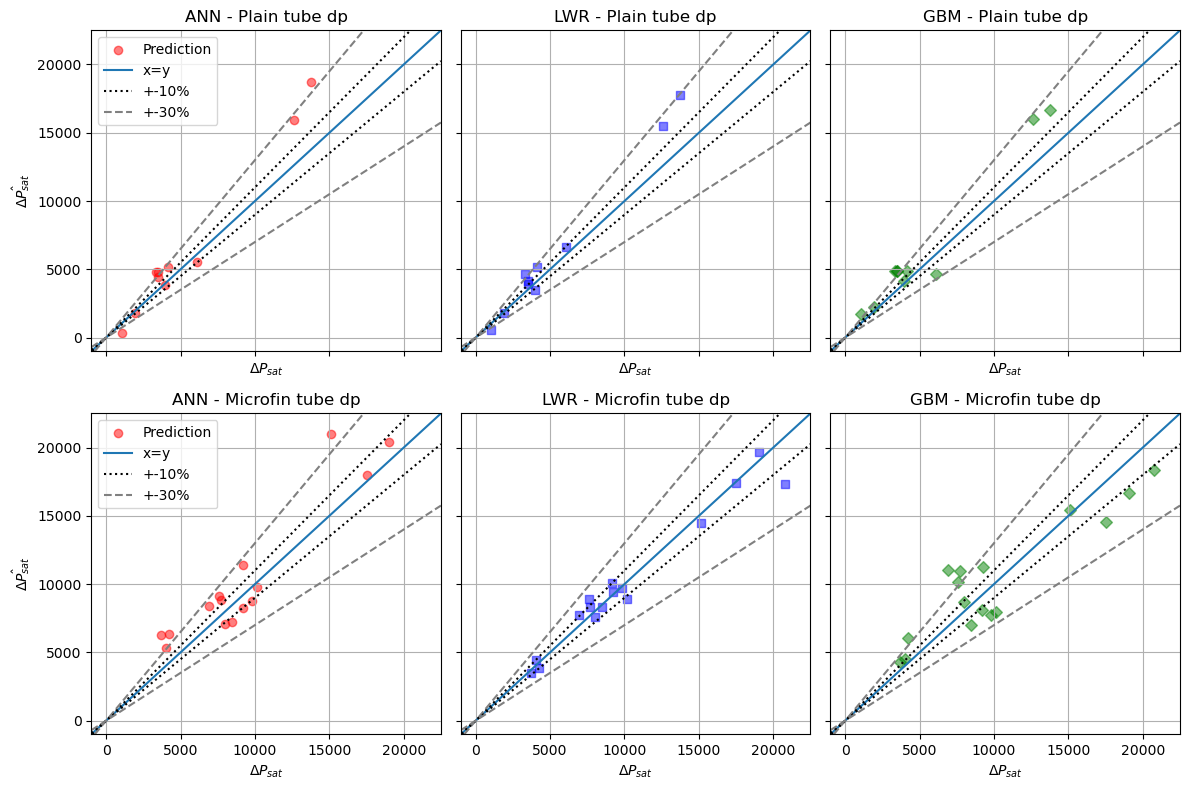

In [360]:
extra_dp.plot_predictions(model_keys=['ANN', 'LWR', 'GBM'], figure_kwargs={'figsize': (12, 8), 'sharex': True}, target_label='\Delta P_{sat}')
plt.xlim(-1000, 22500)
plt.ylim(-1000, 22500)


In [404]:
a = extra_dp.displayAllModelTestResults()
b = dp.displayAllModelTestResults()

pd.concat([b, a], axis=1, keys=['Standard Split', 'Outlier Split']).round(4)

Standard Split                       Outlier Split             \
                     ANN        LWR        GBM           ANN        LWR   
R2                0.8761     0.8852     0.8782        0.7827     0.8925   
RMSE           2128.7384  2048.8154  2110.3137     3620.0848  2546.0281   
MAE            1313.8884  1164.6704  1262.5648     2345.3969  1467.0132   
MAPE              0.1473     0.1294     0.1468        0.2458     0.1381   
Bias%             0.0206     0.0415    -0.0053        0.0328    -0.0391   
WAPE%             0.1349     0.1196     0.1296        0.2207     0.1380   
Pearson-R         0.8773     0.8912     0.8840        0.7871     0.9093   

                      
                 GBM  
R2            0.7979  
RMSE       3491.2865  
MAE        2521.3149  
MAPE          0.2589  
Bias%        -0.0587  
WAPE%         0.2372  
Pearson-R     0.8501

In [241]:
u.assignConfigCols(htp, 'ANNRandomized').pipe(u.displayNicely)

tol
solver
learning_rate_init
hidden_layer_sizes
alpha
activation


,Tol,Solver,Learning Rate Init,Hidden Layer Sizes,Alpha,Activation,Fit Time,Score Time,Test R2,Train R2,Test Rmse,Train Rmse,Test Mae,Train Mae,Test Mape,Train Mape
0,1e-05,lbfgs,0.001,"(10, 10, 10, 10)",0.0,relu,2.672708,0.012338,49.35%,0.999828,-844.814663,-11.045171,-526.885581,-3.999091,-0.100107,-0.000962
1,1e-05,lbfgs,0.01,"(10, 10, 10, 10)",0.0,relu,2.958214,0.024003,49.35%,0.999828,-844.814663,-11.045171,-526.885581,-3.999091,-0.100107,-0.000962
2,1e-05,lbfgs,0.1,"(10, 10, 10, 10)",0.0,relu,2.871021,0.018671,49.35%,0.999828,-844.814663,-11.045171,-526.885581,-3.999091,-0.100107,-0.000962
3,1e-05,lbfgs,0.1,"(10, 10)",0.0,relu,1.300619,0.029175,59.79%,0.997715,-720.679746,-53.047705,-509.072516,-30.995332,-0.100941,-0.006929
4,1e-05,lbfgs,0.001,"(10, 10)",0.0001,relu,1.016845,0.014335,66.65%,0.997281,-648.696372,-62.568484,-445.303983,-35.705645,-0.089199,-0.007729
5,1e-05,lbfgs,0.1,"(10, 10)",0.0001,relu,0.921782,0.013333,66.65%,0.997281,-648.696372,-62.568484,-445.303983,-35.705645,-0.089199,-0.007729
6,1e-05,lbfgs,0.01,"(10, 10)",0.0001,relu,1.135060,0.012348,66.65%,0.997281,-648.696372,-62.568484,-445.303983,-35.705645,-0.089199,-0.007729
7,1e-05,lbfgs,0.1,"(10, 10, 10, 10)",0.0001,relu,1.270497,0.012845,67.09%,0.999277,-691.555881,-31.841927,-425.276391,-13.431192,-0.079515,-0.003130
8,1e-05,lbfgs,0.1,"(50, 50)",0.0,relu,0.913000,0.012000,69.45%,0.999981,-614.824757,-3.268220,-453.803765,-1.234568,-0.090637,-0.000283
9,1e-05,lbfgs,0.1,"(128, 64, 32, 16, 8)",0.0,relu,2.932414,0.013001,71.20%,0.999930,-618.491809,-6.059326,-448.803208,-2.487227,-0.089138,-0.000558


In [269]:
u.assignConfigCols(htp, 'LWR').pipe(u.displayNicely)

gamma
n_neighbors


,Gamma,N Neighbors,Fit Time,Score Time,Test R2
0,0.7,5,0.006179,0.078701,-1138408884880419848192.00%
1,1.8,5,0.013062,0.105767,-55914069245974601728.00%
2,7.0,5,0.012639,0.089384,-2516610440002691072.00%
3,5.0,5,0.013728,0.106336,-470021082389209728.00%
4,4.0,5,0.011889,0.090513,-217856444986269184.00%
...,...,...,...,...,...
99,1.8,40,0.033836,0.119896,82.13%
100,1.8,50,0.019068,0.129227,82.16%
101,1.0,40,0.012462,0.083270,82.22%
102,1.5,50,0.011213,0.193246,82.36%


In [315]:
u.assignConfigCols(htp, 'GBMFocused').pipe(u.displayNicely)

learning_rate
num_leaves
reg_alpha
reg_lambda


,Learning Rate,Num Leaves,Reg Alpha,Reg Lambda,Fit Time,Score Time,Test R2
0,0.001,32,3.0,3.0,0.278104,0.011438,3.86%
1,0.001,64,3.0,3.0,0.364674,0.010436,3.86%
2,0.001,16,3.0,3.0,0.462233,0.012744,3.86%
3,0.001,64,0.1,3.0,0.282129,0.014461,3.86%
4,0.001,32,0.1,3.0,0.276845,0.012380,3.86%
...,...,...,...,...,...,...,...
130,0.2,32,3.0,3.0,0.308493,0.011816,65.53%
131,0.2,64,3.0,3.0,0.295696,0.011253,65.53%
132,0.2,32,0.1,3.0,0.289120,0.011642,65.57%
133,0.2,64,0.1,3.0,0.262723,0.013645,65.57%


In [ ]:
u.assignConfigCols(htp, 'GBM')#.corr()['test_R2'].iloc[:4].plot.bar()

num_leaves
reg_alpha
reg_lambda


,num_leaves,reg_alpha,reg_lambda,fit_time,score_time,test_R2,test_RMSE,test_MAE,test_MAPE,test_Bias%,test_WAPE%,test_Pearson-R
0,2,3.0,1.0,0.155128,0.011005,0.565155,-787.643944,-577.633607,-0.112352,0.004110,-0.115152,0.589960
1,2,2.0,1.0,0.152627,0.010999,0.565155,-787.643528,-577.639515,-0.112353,0.004102,-0.115154,0.589947
2,2,1.0,1.0,0.194438,0.011802,0.565170,-787.625713,-577.616801,-0.112347,0.004102,-0.115149,0.589952
3,2,0.5,1.0,0.149633,0.012200,0.565199,-787.591779,-577.613046,-0.112347,0.004101,-0.115148,0.589986
4,2,0.1,1.0,0.137935,0.012503,0.565199,-787.591487,-577.611726,-0.112347,0.004101,-0.115148,0.589985
...,...,...,...,...,...,...,...,...,...,...,...,...
724,4,10.0,0.0,0.197540,0.011104,0.650024,-708.348948,-501.729696,-0.097389,0.006233,-0.100212,0.675216
725,4,10.0,0.1,0.197039,0.011400,0.650319,-708.743923,-501.916129,-0.097537,0.006161,-0.100232,0.675180
726,4,5.0,3.0,0.198237,0.028709,0.651258,-708.144484,-505.438359,-0.098439,0.004549,-0.100976,0.675987
727,4,4.0,3.0,0.198341,0.010600,0.651359,-708.014920,-505.317783,-0.098411,0.004544,-0.100951,0.676159


In [210]:
htp.displayAllModelTestResults()

,ANN,LWR,GBM
R2,0.391177,0.823543,0.703180
RMSE,913.520187,491.803573,637.851253
MAE,475.903875,370.787032,508.478730
MAPE,0.083639,0.071950,0.104531
Bias%,0.000583,0.006690,0.005002
WAPE%,0.095968,0.074770,0.102536
Pearson-R,0.679125,0.828147,0.703965


In [211]:
dp.displayAllModelTestResults()

,ANN,LWR,GBM
R2,0.876092,0.885222,0.878228
RMSE,2128.738423,2048.815365,2110.313716
MAE,1313.888409,1164.670400,1262.564792
MAPE,0.147334,0.129438,0.146801
Bias%,0.020617,0.041475,-0.005331
WAPE%,0.134901,0.119580,0.129632
Pearson-R,0.877317,0.891208,0.883997


In [58]:
htp.X_train.describe().loc[['mean', 'std', 'count']].T

mean           std  count
                 0                                          
Input Raw        Input 1     282.029556     77.089806  139.0
                 Input 2  538491.415562  58687.147696  139.0
                 Input 3   12601.337777   2349.823368  139.0
                 Input 4       0.501118      0.158041  139.0
                 Input 5    9494.690594   5798.094909  139.0
Input Calculated Input 1    5674.497732   2657.723149  138.0
                 Input 2       0.228337      0.136222  139.0
                 Input 3       0.664509      0.342018  139.0
                 Input 4      66.136773     34.155439  139.0
                 Input 5       0.164665      0.088016  139.0

In [40]:
extra_htp.displayAllModelTestResults()

,ANN,LWR,GBM
R2,0.656591,0.758915,0.488506
RMSE,866.287529,725.841152,1057.246388
MAE,639.002225,534.330825,691.413324
MAPE,0.106882,0.089451,0.108179
Bias%,-0.000478,-0.061961,-0.105414
WAPE%,0.112055,0.093700,0.121246
Pearson-R,0.739996,0.818665,0.693040


In [24]:
pd.DataFrame(model_selection.cross_validate(
    base.clone(htp.models['ANN'].best_estimator_),
    htp.X_train,
    htp.y_train,
    cv=u.ArbitraryStratifiedKFold(n_splits=5, shuffle=True, random_state=0),
    groups=htp.cats,
    scoring=u.SCORING
)).mean()

fit_time            0.072642
score_time          0.006311
test_R2             0.813057
test_RMSE        -486.492064
test_MAE         -345.697136
test_MAPE          -0.066551
test_Bias%          0.019460
test_WAPE%         -0.069110
test_Pearson-R      0.848889
dtype: float64

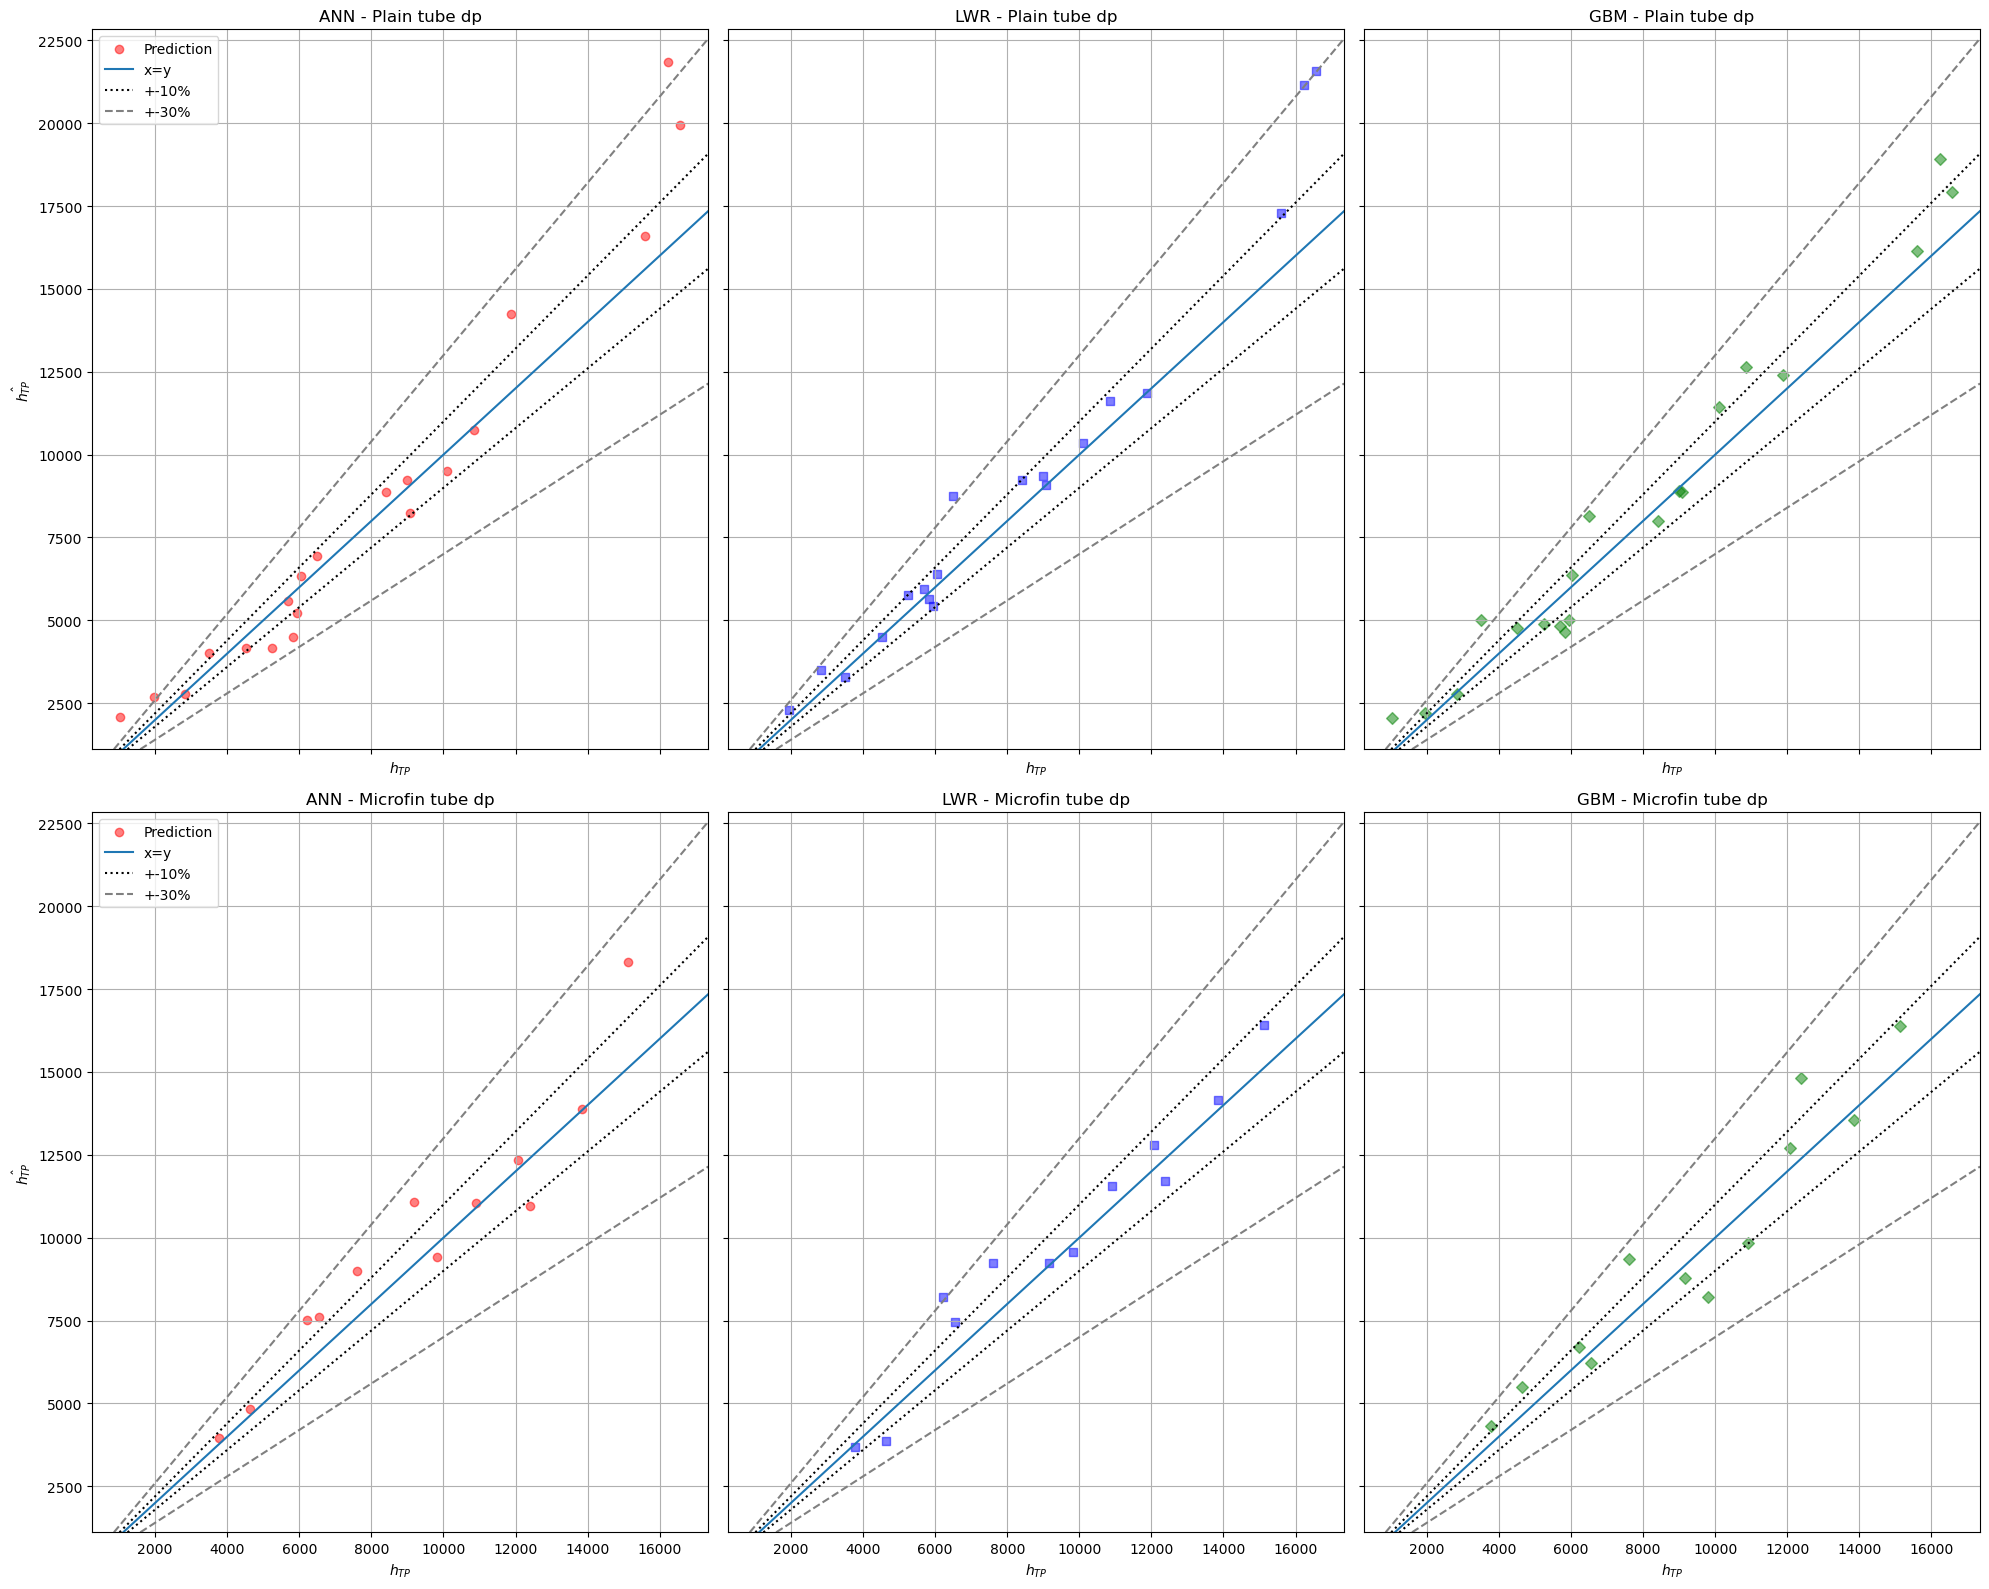

In [39]:
dp.plot_predictions(figure_kwargs=dict(sharex=True))

In [59]:
pd.DataFrame(model_selection.cross_validate(
    base.clone(htp.models['LWR'].best_estimator_),
    htp.X,
    htp.y,
    cv=u.ArbitraryStratifiedKFold(n_splits=10, shuffle=True, random_state=0),
    groups=htp.sample_category,
    scoring=u.SCORING
)).mean()

fit_time            0.006360
score_time          0.024185
test_R2             0.821501
test_RMSE        -468.182529
test_MAE         -335.027670
test_MAPE          -0.066498
test_Bias%         -0.014228
test_WAPE%         -0.066431
test_Pearson-R      0.869623
dtype: float64

In [60]:
pd.DataFrame(model_selection.cross_validate(
    base.clone(htp.models['GBM'].best_estimator_),
    htp.X,
    htp.y,
    cv=u.ArbitraryStratifiedKFold(n_splits=10, shuffle=True, random_state=0),
    groups=htp.sample_category,
    scoring=u.SCORING
)).mean()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 439
[LightGBM] [Info] Number of data points in the train set: 156, number of used features: 10
[LightGBM] [Info] Start training from score 4977.723138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 436
[LightGBM] [Info] Number of data points in the train set: 156, number of used features: 10
[LightGBM] [Info] Start training from score 4999.914014
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000061 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 437
[LightGBM] [Info] Number of data points in the train set: 156, number of used features: 10
[LightGBM] [Info] Start traini

fit_time            0.021304
score_time          0.018938
test_R2             0.711347
test_RMSE        -611.234244
test_MAE         -447.809876
test_MAPE          -0.086534
test_Bias%          0.000753
test_WAPE%         -0.089010
test_Pearson-R      0.753601
dtype: float64

In [10]:
htp.displayCounts()

,Count
dataset,
Microfin tube h,85
Plain tube h,89


# Additional analysis

In [52]:
import pandas as pd
pd.set_option('display.max_columns', 100)

In [54]:
assignConfigCols(htp, 'ANN')

activation
alpha
hidden_layer_sizes
learning_rate_init
solver
tol


,activation,alpha,hidden_layer_sizes,learning_rate_init,solver,tol,fit_time,score_time,test_R2,train_R2,test_RMSE,train_RMSE,test_MAE,train_MAE,test_MAPE,train_MAPE,test_Bias%,train_Bias%,test_WAPE%,train_WAPE%,test_Pearson-R,train_Pearson-R
0,logistic,0.0001,"(50, 50)",0.1,sgd,1e-05,0.078532,0.014337,-0.194493,-0.184837,-1322.643048,-1331.736170,-1007.553177,-1006.858062,-0.185980,-0.185768,0.112738,0.113193,-0.201215,-0.201228,0.516105,0.528649
1,logistic,0.01,"(50, 50)",0.1,sgd,1e-05,0.052513,0.019673,-0.194310,-0.184668,-1322.546305,-1331.641506,-1007.513910,-1006.824707,-0.185983,-0.185773,0.112680,0.113135,-0.201207,-0.201221,0.516111,0.528657
2,logistic,0.0001,"(128, 64, 32, 16, 8)",0.01,sgd,1e-05,0.132405,0.026329,-0.103862,-0.066682,-1264.815358,-1263.657909,-979.200771,-980.678449,-0.214601,-0.214861,-0.063795,-0.063139,-0.195744,-0.196010,0.064618,0.058857
3,logistic,0.01,"(128, 64, 32, 16, 8)",0.01,sgd,1e-05,0.122543,0.017512,-0.103856,-0.066677,-1264.812697,-1263.655460,-979.198602,-980.676724,-0.214601,-0.214860,-0.063793,-0.063137,-0.195743,-0.196010,0.064613,0.058852
4,logistic,0.01,"(50, 50)",0.1,adam,1e-05,0.056853,0.015347,-0.070238,-0.044606,-1254.854057,-1251.006737,-977.553486,-956.936717,-0.186451,-0.180983,0.077189,0.080278,-0.195227,-0.191241,0.121602,0.187268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,relu,0.01,"(10, 10)",0.1,adam,1e-05,0.258577,0.013666,0.811734,0.974193,-499.626881,-190.266906,-371.981292,-141.025047,-0.073371,-0.030034,0.005551,-0.008110,-0.074398,-0.028230,0.835734,0.979341
212,relu,0.0001,"(10, 10)",0.01,sgd,1e-05,1.766731,0.014506,0.811962,0.969352,-519.576950,-214.001819,-370.985019,-164.895180,-0.074540,-0.034302,0.008738,0.000077,-0.074170,-0.032936,0.841196,0.969398
213,relu,0.01,"(50, 50)",0.001,adam,1e-05,1.570092,0.035846,0.814607,0.995407,-507.337686,-82.115124,-374.309751,-50.523314,-0.074872,-0.010635,0.005667,0.000036,-0.074834,-0.010094,0.830100,0.995425
214,relu,0.01,"(10, 10)",0.1,sgd,1e-05,0.484811,0.026674,0.816675,0.962266,-512.822437,-223.967561,-376.199827,-171.551811,-0.074624,-0.035722,0.014149,0.007630,-0.075205,-0.034247,0.838934,0.970079


In [106]:
_ = assignConfigCols(dp, 'ANN').rename_axis("index").pipe(displayNicely).sort_values('Test R2', ascending=True)
_

activation
alpha
hidden_layer_sizes
learning_rate_init
solver
tol


,Activation,Alpha,Hidden Layer Sizes,Learning Rate Init,Solver,Tol,Fit Time,Score Time,Test R2,Train R2,Test Rmse,Train Rmse,Test Mae,Train Mae,Test Mape,Train Mape
index,,,,,,,,,,,,,,,,
21,logistic,0.0001,"(10, 10)",0.01,sgd,1e-05,0.050022,0.017510,-0.87%,1.687583e-04,-5773.102787,-5769.631302,-4882.569913,-4844.152208,-0.892725,-0.885510
20,logistic,0.01,"(10, 10)",0.01,sgd,1e-05,0.062185,0.022350,-0.87%,1.665462e-04,-5773.109146,-5769.637704,-4882.570201,-4844.152604,-0.892724,-0.885508
19,logistic,0.0001,"(128, 64, 32, 16, 8)",0.1,sgd,1e-05,0.138560,0.036184,-1.14%,-3.466099e-04,-5777.961051,-5771.169585,-4822.900658,-4784.742443,-0.855549,-0.848187
18,logistic,0.01,"(128, 64, 32, 16, 8)",0.1,sgd,1e-05,0.150886,0.042849,-1.14%,-3.462635e-04,-5777.960741,-5771.168585,-4822.888642,-4784.730511,-0.855542,-0.848180
16,logistic,0.01,"(128, 64, 32, 16, 8)",0.1,lbfgs,1e-05,0.370139,0.013671,-1.18%,-5.986900e-11,-5778.172546,-5770.169678,-4802.715346,-4765.426624,-0.843868,-0.836520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,relu,0.01,"(50, 50)",0.001,sgd,1e-05,1.860257,0.014333,93.03%,9.679419e-01,-1498.415244,-1030.655106,-1115.212375,-747.346606,-0.130227,-0.090027
212,relu,0.0001,"(50, 50)",0.01,sgd,1e-05,0.881993,0.016015,93.04%,9.867374e-01,-1479.790702,-659.650912,-1053.495614,-448.358761,-0.120255,-0.053047
213,relu,0.01,"(50, 50)",0.01,sgd,1e-05,1.196146,0.016673,93.09%,9.864223e-01,-1475.066892,-667.721455,-1050.747537,-454.025250,-0.119931,-0.053669


In [48]:
process_ann_results(htp.models_cv['GBM'])[0].reset_index().pipe(assignConfigCols)

activation
alpha
hidden_layer_sizes
learning_rate_init
solver
tol


,activation,alpha,hidden_layer_sizes,learning_rate_init,solver,tol,fit_time,score_time,test_R2,train_R2,test_RMSE,train_RMSE,test_MAE,train_MAE,test_MAPE,train_MAPE,test_Bias%,train_Bias%,test_WAPE%,train_WAPE%,test_Pearson-R,train_Pearson-R
0,logistic,0.0001,"(50, 50)",0.1,sgd,1e-05,0.078532,0.014337,-0.194493,-0.184837,-1322.643048,-1331.736170,-1007.553177,-1006.858062,-0.185980,-0.185768,0.112738,0.113193,-0.201215,-0.201228,0.516105,0.528649
1,logistic,0.01,"(50, 50)",0.1,sgd,1e-05,0.052513,0.019673,-0.194310,-0.184668,-1322.546305,-1331.641506,-1007.513910,-1006.824707,-0.185983,-0.185773,0.112680,0.113135,-0.201207,-0.201221,0.516111,0.528657
2,logistic,0.0001,"(128, 64, 32, 16, 8)",0.01,sgd,1e-05,0.132405,0.026329,-0.103862,-0.066682,-1264.815358,-1263.657909,-979.200771,-980.678449,-0.214601,-0.214861,-0.063795,-0.063139,-0.195744,-0.196010,0.064618,0.058857
3,logistic,0.01,"(128, 64, 32, 16, 8)",0.01,sgd,1e-05,0.122543,0.017512,-0.103856,-0.066677,-1264.812697,-1263.655460,-979.198602,-980.676724,-0.214601,-0.214860,-0.063793,-0.063137,-0.195743,-0.196010,0.064613,0.058852
4,logistic,0.01,"(50, 50)",0.1,adam,1e-05,0.056853,0.015347,-0.070238,-0.044606,-1254.854057,-1251.006737,-977.553486,-956.936717,-0.186451,-0.180983,0.077189,0.080278,-0.195227,-0.191241,0.121602,0.187268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,relu,0.01,"(10, 10)",0.1,adam,1e-05,0.258577,0.013666,0.811734,0.974193,-499.626881,-190.266906,-371.981292,-141.025047,-0.073371,-0.030034,0.005551,-0.008110,-0.074398,-0.028230,0.835734,0.979341
212,relu,0.0001,"(10, 10)",0.01,sgd,1e-05,1.766731,0.014506,0.811962,0.969352,-519.576950,-214.001819,-370.985019,-164.895180,-0.074540,-0.034302,0.008738,0.000077,-0.074170,-0.032936,0.841196,0.969398
213,relu,0.01,"(50, 50)",0.001,adam,1e-05,1.570092,0.035846,0.814607,0.995407,-507.337686,-82.115124,-374.309751,-50.523314,-0.074872,-0.010635,0.005667,0.000036,-0.074834,-0.010094,0.830100,0.995425
214,relu,0.01,"(10, 10)",0.1,sgd,1e-05,0.484811,0.026674,0.816675,0.962266,-512.822437,-223.967561,-376.199827,-171.551811,-0.074624,-0.035722,0.014149,0.007630,-0.075205,-0.034247,0.838934,0.970079


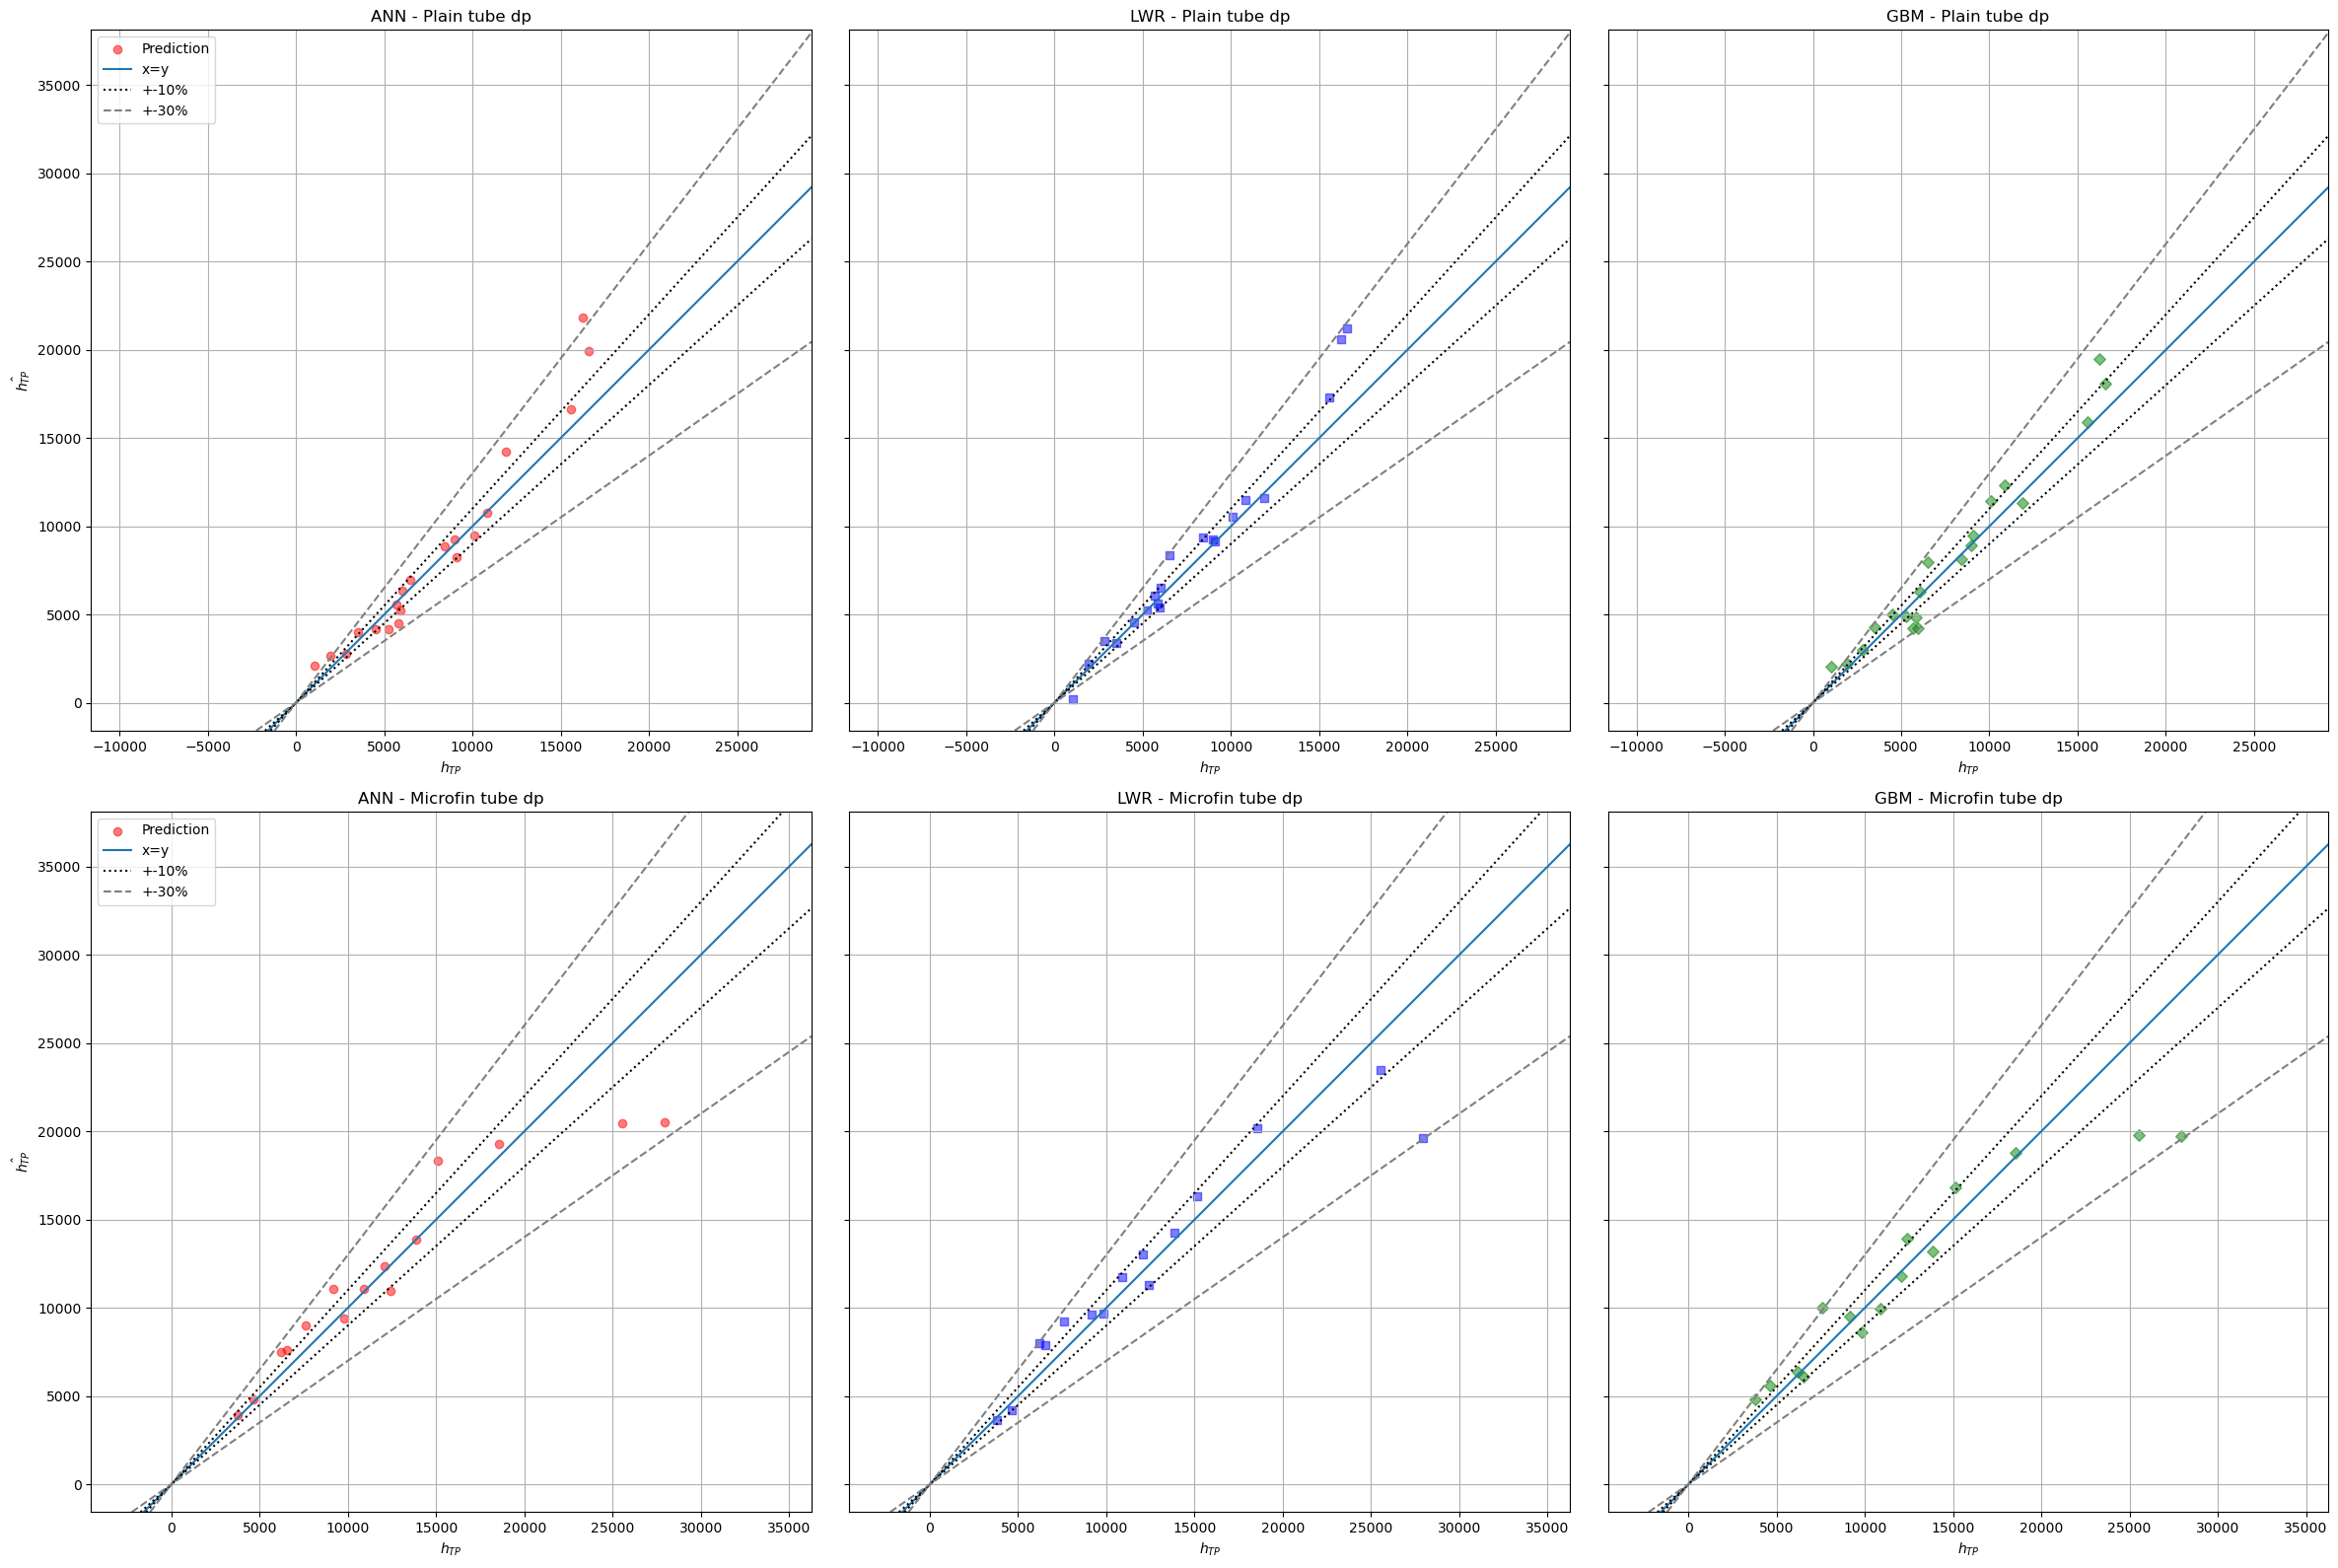

In [8]:
dp.plot_predictions(figure_kwargs=dict(figsize=(24, 16)))

In [3]:
extra_htp.displayAllModelTestResults()

,ANN,LWR,GBM
R2,0.656591,0.758915,0.500685
RMSE,866.287529,725.841152,1044.584141
MAE,639.002225,534.330825,679.639973
MAPE,0.106882,0.089451,0.105882
Bias%,-0.000478,-0.061961,-0.105651
WAPE%,0.112055,0.093700,0.119181
Pearson-R,0.739996,0.818665,0.708316


In [4]:
extra_dp.displayAllModelTestResults()

,ANN,LWR,GBM
R2,0.782722,0.896018,0.790065
RMSE,3620.084787,2504.318332,3558.388607
MAE,2345.396885,1475.502880,2535.730988
MAPE,0.245799,0.146356,0.257006
Bias%,0.032832,-0.039206,-0.062514
WAPE%,0.220685,0.138834,0.238594
Pearson-R,0.787135,0.912649,0.846054


In [5]:
htp.displayAllModelTestResults()

,ANN,LWR,GBM
R2,0.684167,0.849524,0.699352
RMSE,657.962636,454.156983,641.951422
MAE,463.039552,350.684576,511.085597
MAPE,0.086264,0.068111,0.105206
Bias%,-0.000915,-0.005086,0.005403
WAPE%,0.093373,0.070717,0.103062
Pearson-R,0.718660,0.850604,0.700007


In [6]:
dp.displayAllModelTestResults()

,ANN,LWR,GBM
R2,0.876092,0.890873,0.886883
RMSE,2128.738423,1997.743085,2033.932503
MAE,1313.888409,1179.350101,1255.277313
MAPE,0.147334,0.126541,0.149837
Bias%,0.020617,0.038111,-0.005568
WAPE%,0.134901,0.121088,0.128883
Pearson-R,0.877317,0.895021,0.891236


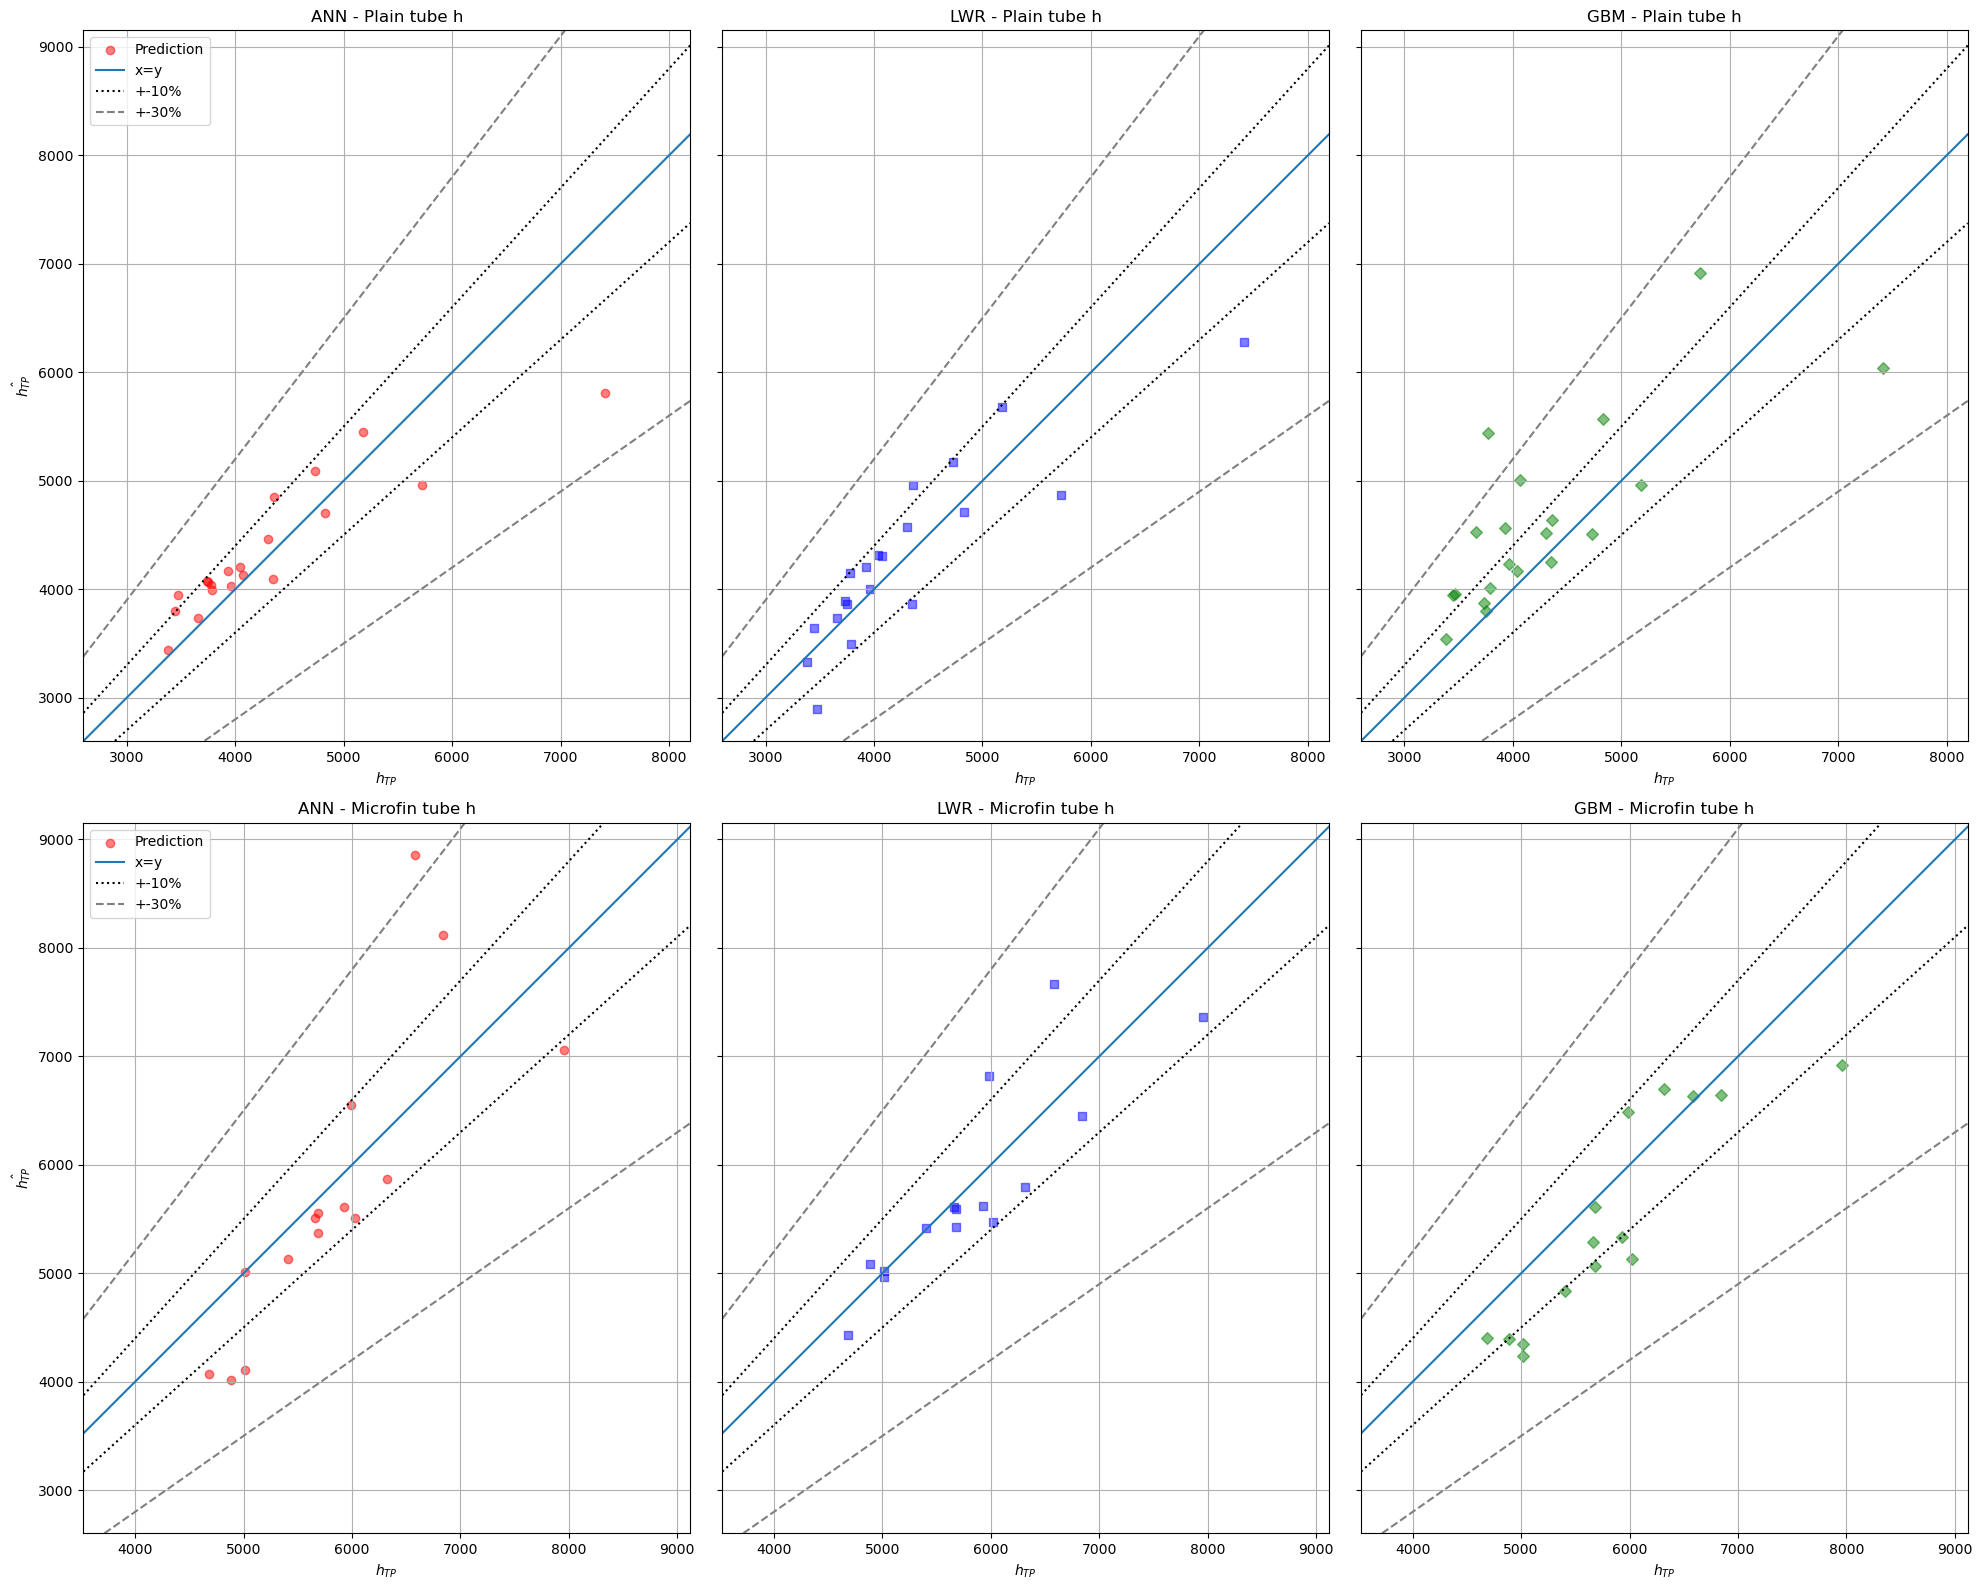

In [14]:
htp.plot_predictions()